In [1]:
from asyncio.sslproto import SSLAgainErrors

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Exam: Re-take

## 5.b)

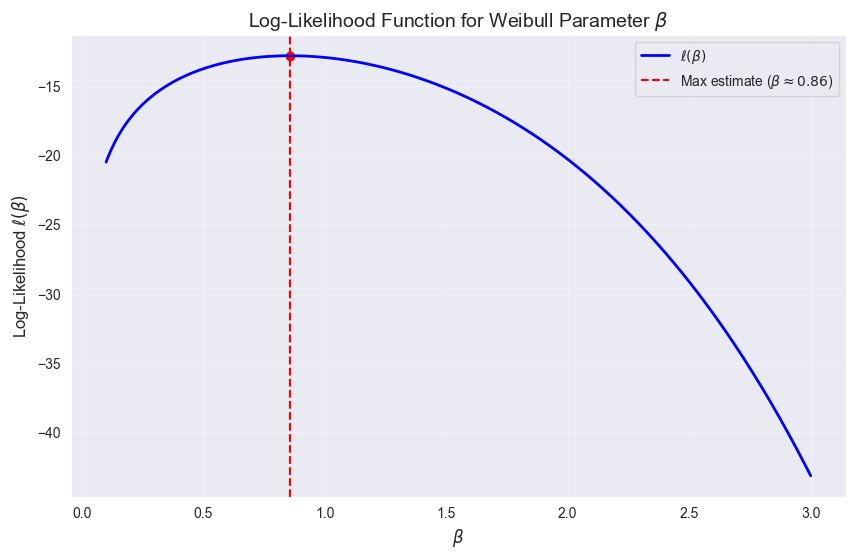

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the Data
x = np.array([0.9, 2.1, 1.4, 1.5, 2.3])
n = len(x)
alpha = 2

# 2. Define the Log-Likelihood Function
def get_log_likelihood(beta):
    # Calculate sum of ln(x) dynamically (approx 2.211)
    sum_ln_x = np.sum(np.log(x))

    # Calculate the four terms of the equation
    term1 = n * np.log(alpha)               # 5 * ln(2)
    term2 = n * np.log(beta)                # 5 * ln(beta)
    term3 = sum_ln_x * (beta - 1)           # 2.211 * (beta - 1)
    term4 = -alpha * np.sum(x**beta)        # -2 * sum(x_i^beta)

    return term1 + term2 + term3 + term4

# 3. Generate Data for Plotting
# Create 400 points between beta = 0.1 and beta = 3.0
betas = np.linspace(0.1, 3.0, 400)
likelihoods = [get_log_likelihood(b) for b in betas]

# 4. Create the Plot
plt.figure(figsize=(10, 6))
plt.plot(betas, likelihoods, label=r'$\ell(\beta)$', color='blue', linewidth=2)

# Optional: Add a marker for the maximum
max_index = np.argmax(likelihoods)
max_beta = betas[max_index]
max_val = likelihoods[max_index]

plt.axvline(max_beta, color='red', linestyle='--', label=f'Max estimate ($\\beta \\approx {max_beta:.2f}$)')
plt.scatter(max_beta, max_val, color='red')

# Formatting
plt.title(r'Log-Likelihood Function for Weibull Parameter $\beta$', fontsize=14)
plt.xlabel(r'$\beta$', fontsize=12)
plt.ylabel(r'Log-Likelihood $\ell(\beta)$', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Save or Show
plt.savefig('log_likelihood_plot.png')
plt.show()

## 6.a) & b)

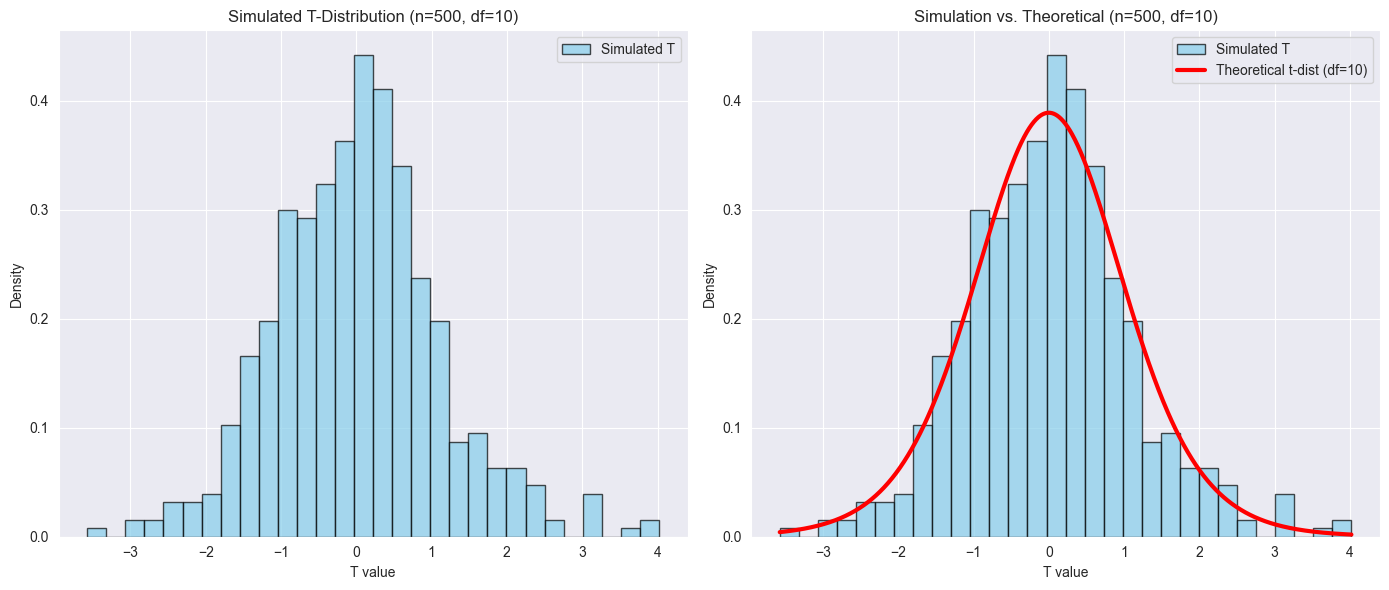

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

np.random.seed(42)

# Parameters
n = 500        # Sample size (as requested in part i)
v = 10         # Degrees of freedom

# 1. Generate Random Variables
X = np.random.normal(0, 1, n)      # Standard Normal
V = np.random.chisquare(v, n)      # Chi-squared with v degrees of freedom

# 2. Compute the T statistic
T = X / np.sqrt(V / v)

# 3. Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(T, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Simulated T')
axes[0].set_title(f'Simulated T-Distribution (n={n}, df={v})')
axes[0].set_xlabel('T value')
axes[0].set_ylabel('Density')
axes[0].legend()

# Simulated Histogram
axes[1].hist(T, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Simulated T')

# Real t-distribution
x = np.linspace(min(T), max(T), 1000)
pdf = t.pdf(x, df=v)
axes[1].plot(x, pdf, 'r-', lw=3, label=f'Theoretical t-dist (df={v})')

axes[1].set_title(f'Simulation vs. Theoretical (n={n}, df={v})')
axes[1].set_xlabel('T value')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()

## 6.c)


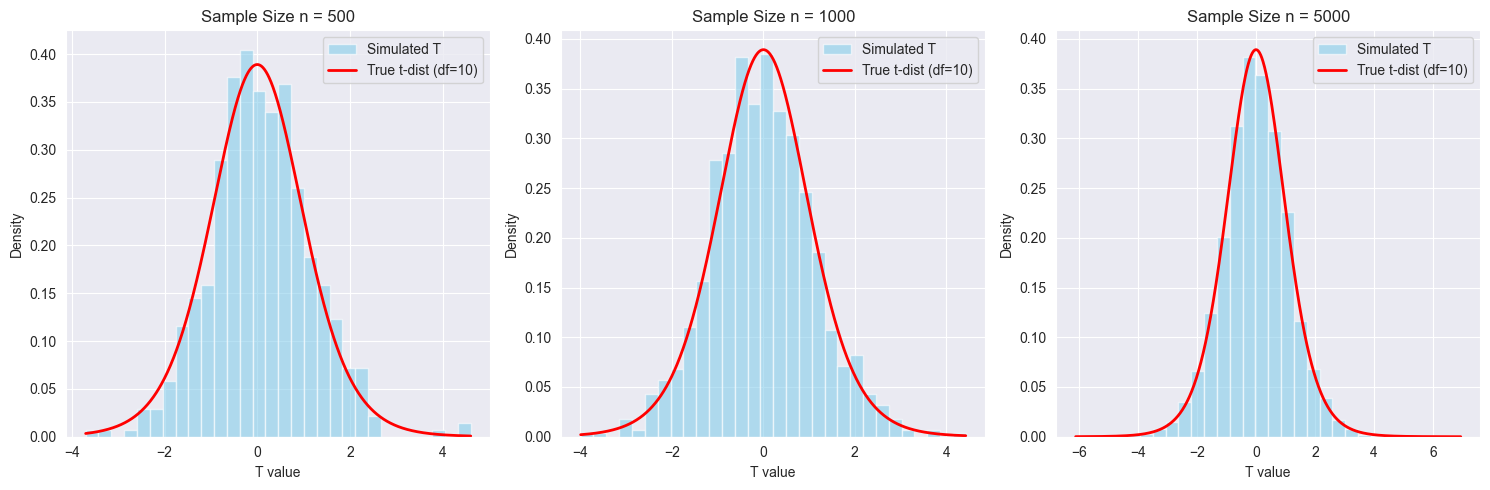

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Configuration
v = 10  # Degrees of freedom
n_values = [500, 1000, 5000]  # Different sample sizes to test (i and iii)

# Set up the plot
plt.figure(figsize=(15, 5))

for index, n in enumerate(n_values):
    # --- Step i: Random Generation ---
    # 1. Generate X ~ N(0, 1)
    X = np.random.normal(0, 1, n)

    # 2. Generate V ~ Chi-squared(v)
    V = np.random.chisquare(v, n)

    # 3. Calculate T
    T = X / np.sqrt(V / v)

    # --- Step ii: Visualization & Fitting ---
    plt.subplot(1, 3, index + 1)

    # Plot Histogram of simulated T (normalized to form a density)
    count, bins, ignored = plt.hist(T, bins=30, density=True, alpha=0.6, color='skyblue', label='Simulated T')

    # Plot Theoretical t-distribution PDF
    x_grid = np.linspace(min(bins), max(bins), 1000)
    pdf = t.pdf(x_grid, df=v)
    plt.plot(x_grid, pdf, color='red', linewidth=2, label=f'True t-dist (df={v})')

    # Labels
    plt.title(f'Sample Size n = {n}')
    plt.xlabel('T value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

## 8.a)

In [22]:
# Importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Data preparation
x1 = [1, 3, 5, 4, 6, 8, 11, 10, 12, 13]
x2 = [35, 28, 34, 29, 29, 37, 41, 38, 45, 47]
y = [90, 92, 108, 102, 103, 111, 121, 123, 137, 154]

# Formating Data
y = np.array(y)
X = np.array([x1, x2]).T

# Fitting Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Output results
print(f"Fitted multiple linear regression equation y = {model.intercept_:.4f} + {model.coef_[0]:.4f} x1 + {model.coef_[1]:.4f} x2 \n R^2 = {model.score(X,y):.4f}")

a) Fitted linear regression equation y = 9.1363 + 0.7187 x1 + 2.8302 x2 
 R^2 = 0.7982


## 8.b)

In [29]:
#importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Data preparation
x1 = [1, 3, 5, 4, 6, 8, 1, 1, 1, 1]
x2 = [35, 28, 34, 29, 29, 37, 41, 38, 45, 47]
y = [90,92,108,102,103,111, 121, 123, 137, 154]
x3 = np.multiply(x1, x2)

# Formating Data
y = np.array(y)
X = np.array([x1, x2,x3]).T

# Fitting Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Output results
print(f"Fitted multiple linear regression equation y = {model.intercept_:.4f} + {model.coef_[0]:.4f} x1 + {model.coef_[1]:.4f} x2 + {model.coef_[2]:.4f} x1*x2\n R^2 = {model.score(X,y):.4f}")



a) Fitted multiple linear regression equation y = -61.6476 + 26.9671 x1 + 4.6223 x2 + -0.7231 x1*x2
 R^2 = 0.8986


## 9.a)

In [36]:
#importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Data preparation
x = [0, 0.5, 1.5, 2, 3, 5, 4.5]
y =[3.4, 3.6, 4.9, 5.7, 4.6, 8.8, 6.7]

# Formating Data
y = np.array(y)
X = np.array(x).reshape(-1, 1)

# Fitting Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Output results
print(f"Fitted linear regression equation y = {model.intercept_:.4f} + {model.coef_[0]:.4f} x\n R^2 = {model.score(X,y):.4f}")



Fitted linear regression equation y = 3.2681 + 0.8984 x
 R^2 = 0.8217


## 9.b)

In [35]:
# importing necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Data preparation
x = [0, 0.5, 1.5, 2, 3, 5, 4.5]
y = [3.4, 3.6, 4.9, 5.7, 4.6, 8.8, 6.7]

# Formatting Data
y = np.array(y)
X = np.array(x).reshape(-1, 1)

# 1. Choose a proper y0
y0 = 3.0

# 2. Logarithm Transform
z = np.log(y - y0)

# 3. Fitting Linear Regression Model to the transformed data
model = LinearRegression()
model.fit(X, z)

# Output results
print(f" Exponential Growth Equation: y = {y0} + {np.exp(model.intercept_):.4f} * e^({model.coef_[0]:.4f} x)")
print(f" R^2 = {model.score(X, z):.4f}")

 Exponential Growth Equation: y = 3.0 + 0.5835 * e^(0.4555 x)
 R^2 = 0.8215


## 11.a)

In [ ]:
import numpy as np
from scipy import stats

# 1. Input of observation variable X and categorical variable K
X = []
K = []

print("--- Data Input ---")
while True:
    k_name = input("Insert category name (or type 'exit' to finish): ")
    if k_name.lower() == 'exit':
        break

    val_str = input(f"Insert observed values for '{k_name}' (space separated): ")
    try:
        vals = [float(x) for x in val_str.split()]
        if len(vals) > 0:
            K.append(k_name)
            X.append(vals)
        else:
            print("No values entered, group skipped.")
    except ValueError:
        print("Invalid input. Please enter numbers separated by space.")

if len(K) < 2:
    print("Error: You need at least 2 groups to perform ANOVA.")
    exit()

# 2. Extract group datasets (Already done in X)
n_k = len(K)
for i in range(n_k):
    print(f"Group {K[i]}: {X[i]}")

# 3. Compute group means and total mean
group_means = [np.mean(group) for group in X]
all_values = [val for group in X for val in group]
total_mean = np.mean(all_values)

print(f"\nGroup means: {group_means}")
print(f"Total mean: {total_mean:.4f}")

# 4. Levene's Test
stat_levene, p_levene = stats.levene(*X)
print(f"Levene's Statistic: {stat_levene:.4f}, p-value: {p_levene:.4f}")

perform_anova = True
if p_levene < 0.05:
    print("Result: Reject Null Hypothesis of Levene's test.")
    print("Variances are NOT equal. Skipping ANOVA (Go to Step 9).")
    perform_anova = False
else:
    print("Result: Fail to reject Null Hypothesis of Levene's test.")
    print("Variances are equal. Proceeding to ANOVA...")

# Variables to store ANOVA results for decision later
f_statistic = 0
critical_value = 0
reject_H0_anova = False

if perform_anova:
    # 5. Compute Sum of Squares: SST, SSA, SSE
    SST = sum([(x - total_mean)**2 for x in all_values])
    SSA = sum([len(X[i]) * (group_means[i] - total_mean)**2 for i in range(n_k)])
    SSE = SST - SSA

    print(f"\nSST: {SST:.4f}, SSA: {SSA:.4f}, SSE: {SSE:.4f}")

    # 6. Compute Mean Squares and F-statistic
    n = len(all_values)
    df1 = n_k - 1
    df2 = n - n_k

    s1_squared = SSA / df1 # Treatment Mean Square (MST)
    s2_squared = SSE / df2 # Error Mean Square (MSE)

    f_statistic = s1_squared / s2_squared
    print(f"Treatment MS (s1^2): {s1_squared:.4f}")
    print(f"Error MS (s2^2): {s2_squared:.4f}")
    print(f"F-statistic: {f_statistic:.4f}")

    # 7. Critical Value
    try:
        alpha = float(input("\nEnter level of significance alpha (e.g., 0.05): "))
    except ValueError:
        alpha = 0.05
        print("Invalid input, defaulting to 0.05")

    critical_value = stats.f.ppf(1 - alpha, df1, df2)
    print(f"Critical value (F_alpha): {critical_value:.4f}")

    # 8. Decision
    if f_statistic > critical_value:
        print("\nDecision: F > Critical Value. Reject H0.")
        print("At least two groups have different means.")
        reject_H0_anova = True
    else:
        print("\nDecision: F < Critical Value. Do not reject H0.")
        print("All groups have the same mean.")
        reject_H0_anova = False

# 9. Identify Min/Max groups and Run Independent T-Test
if reject_H0_anova or (not perform_anova):
    print("\n--- Step 9: Testing Min vs Max Group ---")

    # Identify indices of min and max means
    min_idx = np.argmin(group_means)
    max_idx = np.argmax(group_means)

    Y_name = K[min_idx]
    Z_name = K[max_idx]
    Y_data = X[min_idx]
    Z_data = X[max_idx]

    print(f"Group with Smallest Mean (Y): {Y_name} (mean={group_means[min_idx]:.4f})")
    print(f"Group with Largest Mean (Z): {Z_name} (mean={group_means[max_idx]:.4f})")

    # Run Independent T-Test
    equal_variances = perform_anova
    t_stat, p_val_t = stats.ttest_ind(Y_data, Z_data, equal_var=equal_variances)

    print(f"\nIndependent t-test between {Y_name} and {Z_name}:")
    print(f"T-statistic: {t_stat:.4f}, p-value: {p_val_t:.4f}")

    # Decision for T-test
    current_alpha = alpha if 'alpha' in locals() else 0.05

    if p_val_t < current_alpha:
        print(f"\nFINAL RESULT: Reject H0.")
        print(f"Significant difference found between group {Y_name} and group {Z_name}.")
    else:
        print(f"\nFINAL RESULT: Do not reject H0.")
        print(f"Difference between {Y_name} and {Z_name} is not statistically significant.")

# 10. Print the final result
if perform_anova and not reject_H0_anova:
    print("\nFINAL RESULT: Accept H0. All groups have the same mean.")

## 11.b)

In [9]:
import numpy as np
from scipy import stats
import pandas as pd

# 1. Input of observation variable X and categorical variable K
# Load dataset
df = pd.read_excel('Data_source.xlsx')

# Define variables
K_labels = df['skill'].unique()             # all unique ethnic groups
X = [df[df['skill'] == k]['income'].dropna().tolist() for k in K_labels]
K = [str(k) for k in K_labels]                 # group labels as strings

print(f"\nLoaded dataset with {len(df)} rows and {len(K)} skill groups.")
for i in range(len(K)):
    print(f"Group {K[i]}: n = {len(X[i])}, mean income = {np.mean(X[i]):.2f}")


# 2. Extract group datasets (Already done in X)
n_k = len(K)
for i in range(n_k):
    print(f"Group {K[i]}: {X[i]}")

# 3. Compute group means and total mean
group_means = [np.mean(group) for group in X]
all_values = [val for group in X for val in group]
total_mean = np.mean(all_values)

print(f"\nGroup means: {group_means}")
print(f"Total mean: {total_mean:.4f}")

# 4. Levene's Test
stat_levene, p_levene = stats.levene(*X)
print(f"Levene's Statistic: {stat_levene:.4f}, p-value: {p_levene:.4f}")

perform_anova = True
if p_levene < 0.05:
    print("Result: Reject Null Hypothesis of Levene's test.")
    print("Variances are NOT equal. Skipping ANOVA (Go to Step 9).")
    perform_anova = False
else:
    print("Result: Fail to reject Null Hypothesis of Levene's test.")
    print("Variances are equal. Proceeding to ANOVA...")

# Variables to store ANOVA results for decision later
f_statistic = 0
critical_value = 0
reject_H0_anova = False

if perform_anova:
    # 5. Compute Sum of Squares: SST, SSA, SSE
    SST = sum([(x - total_mean) ** 2 for x in all_values])
    SSA = sum([len(X[i]) * (group_means[i] - total_mean) ** 2 for i in range(n_k)])
    SSE = SST - SSA

    print(f"\nSST: {SST:.4f}, SSA: {SSA:.4f}, SSE: {SSE:.4f}")

    # 6. Compute Mean Squares and F-statistic
    n = len(all_values)
    df1 = n_k - 1
    df2 = n - n_k

    s1_squared = SSA / df1  # Treatment Mean Square (MST)
    s2_squared = SSE / df2  # Error Mean Square (MSE)

    f_statistic = s1_squared / s2_squared
    print(f"Treatment MS (s1^2): {s1_squared:.4f}")
    print(f"Error MS (s2^2): {s2_squared:.4f}")
    print(f"F-statistic: {f_statistic:.4f}")

    # 7. Critical Value
    try:
        alpha = float(input("\nEnter level of significance alpha (e.g., 0.05): "))
    except ValueError:
        alpha = 0.05
        print("Invalid input, defaulting to 0.05")

    critical_value = stats.f.ppf(1 - alpha, df1, df2)
    print(f"Critical value (F_alpha): {critical_value:.4f}")

    # 8. Decision
    if f_statistic > critical_value:
        print("\nDecision: F > Critical Value. Reject H0.")
        print("At least two groups have different means.")
        reject_H0_anova = True
    else:
        print("\nDecision: F < Critical Value. Do not reject H0.")
        print("All groups have the same mean.")
        reject_H0_anova = False

# 9. Identify Min/Max groups and Run Independent T-Test
if reject_H0_anova or (not perform_anova):
    print("\n9: Testing Min vs Max Group")

    # Identify indices of min and max means
    min_idx = np.argmin(group_means)
    max_idx = np.argmax(group_means)

    Y_name = K[min_idx]
    Z_name = K[max_idx]
    Y_data = X[min_idx]
    Z_data = X[max_idx]

    print(f"Group with Smallest Mean (Y): {Y_name} (mean={group_means[min_idx]:.4f})")
    print(f"Group with Largest Mean (Z): {Z_name} (mean={group_means[max_idx]:.4f})")

    # Run Independent T-Test
    equal_variances = perform_anova
    t_stat, p_val_t = stats.ttest_ind(Y_data, Z_data, equal_var=equal_variances)

    print(f"\nIndependent t-test between {Y_name} and {Z_name}:")
    print(f"T-statistic: {t_stat:.4f}, p-value: {p_val_t:.4f}")

    # Decision for T-test
    current_alpha = alpha if 'alpha' in locals() else 0.05

    if p_val_t < current_alpha:
        print(f"\nFINAL RESULT: Reject H0.")
        print(f"Significant difference found between group {Y_name} and group {Z_name}.")
    else:
        print(f"\nFINAL RESULT: Do not reject H0.")
        print(f"Difference between {Y_name} and {Z_name} is not statistically significant.")

# 10. Print the final result
if perform_anova and not reject_H0_anova:
    print("\nFINAL RESULT: Accept H0. All groups have the same mean.")


Loaded dataset with 70 rows and 4 skill groups.
Group 3: n = 20, mean income = 16.19
Group 4: n = 16, mean income = 16.48
Group 1: n = 14, mean income = 15.26
Group 2: n = 18, mean income = 14.58
Group 3: [16.6, 14.6, 16.4, 18.6, 16.6, 17.6, 15.0, 18.0, 17.0, 12.4, 13.6, 16.6, 16.0, 18.0, 15.6, 13.6, 13.6, 19.0, 17.2, 17.8]
Group 4: [17.8, 18.0, 18.2, 16.4, 14.4, 17.6, 13.2, 13.4, 20.6, 18.2, 14.8, 15.6, 17.4, 14.2, 12.8, 21.0]
Group 1: [16.0, 17.0, 17.6, 17.4, 16.0, 13.4, 15.0, 14.0, 14.6, 13.0, 15.4, 13.8, 15.8, 14.6]
Group 2: [17.6, 13.8, 14.2, 15.8, 16.6, 13.4, 14.0, 16.2, 12.4, 15.0, 11.8, 15.0, 15.2, 13.6, 14.2, 13.8, 16.0, 13.8]

Group means: [np.float64(16.190000000000005), np.float64(16.475), np.float64(15.257142857142858), np.float64(14.577777777777776)]
Total mean: 15.6382
Levene's Statistic: 2.6539, p-value: 0.0560
Result: Fail to reject Null Hypothesis of Levene's test.
Variances are equal. Proceeding to ANOVA...

SST: 266.9006, SSA: 39.5672, SSE: 227.3334
Treatment MS (s

### Textbook 11.7 Linear Regression - Slope and Intercept

Slope (Coefficient): [0.35326666]
Intercept: 31.70866036323249


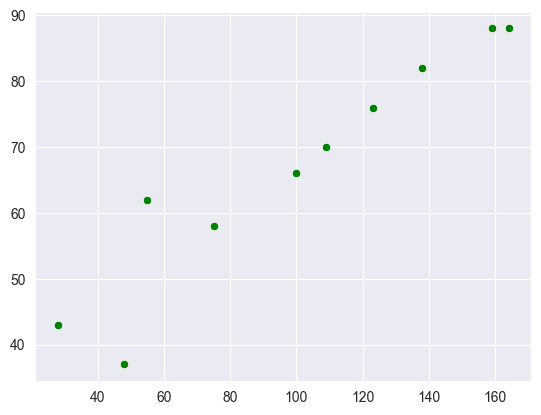

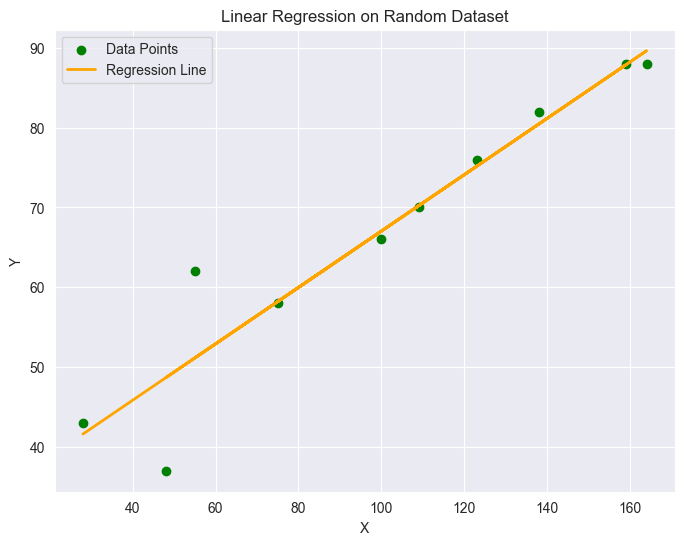

In [3]:
y = [76, 62, 66, 58, 88, 70, 37, 82, 88, 43]
x = [123, 55, 100, 75, 159, 109, 48, 138, 164, 28]

sns.scatterplot(x=x, y=y, color='green')

# Convert to numpy arrays and reshape x to 2D
x = np.array(x).reshape(-1, 1)
y = np.array(y)

model_ex = LinearRegression()
model_ex.fit(x, y)

Y_pred = model_ex.predict(x)

print("Slope (Coefficient):", model_ex.coef_)
print("Intercept:", model_ex.intercept_)

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='green', label='Data Points')
plt.plot(x, Y_pred, color='orange', linewidth=2, label='Regression Line')
plt.title('Linear Regression on Random Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()



### Textbook 11.9 Linear Regression

a) Scatter diagram:
b) Equation y = 3.2208 * x + 343.7056


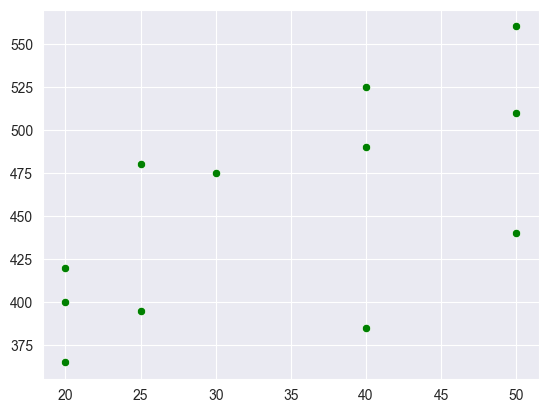

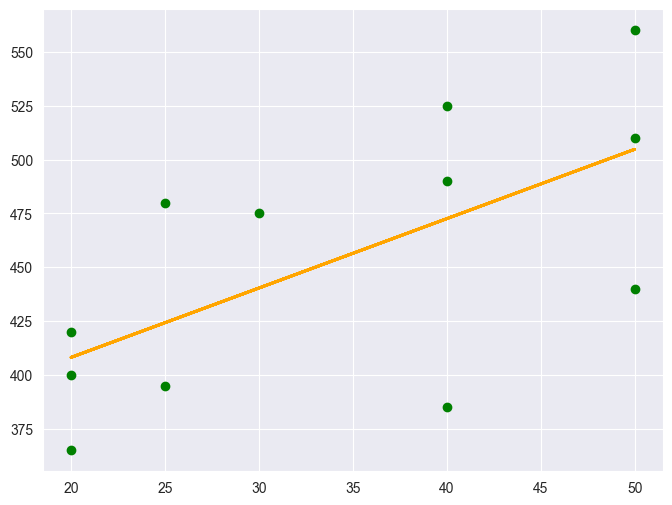

Prediction when sales are 35$:  456.43401015228426


<Axes: >

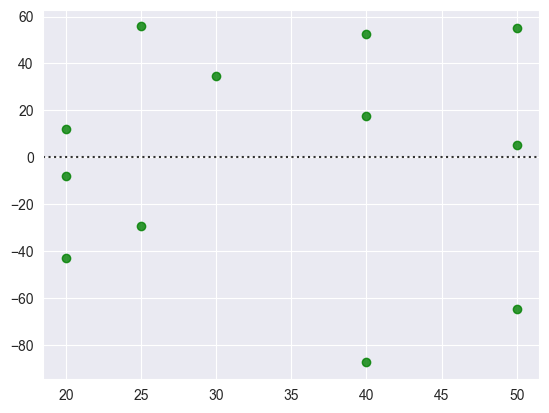

In [4]:


X = [40, 20, 25, 20, 30, 50, 40, 20, 50, 40, 25, 50]
y = [385, 400, 395, 365, 475, 440, 490, 420, 560, 525, 480, 510]

print("a) Scatter diagram:")
sns.scatterplot(x=X, y=y, color='green')

x = np.array(X).reshape(-1, 1)
y = np.array(y)

model_ex = LinearRegression()
model_ex.fit(x, y)
Y_pred = model_ex.predict(x)
print(f"b) Equation y = {model_ex.coef_[0]:.4f} * x + {model_ex.intercept_:.4f}")

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='green', label='Data Points')
plt.plot(x, Y_pred, color='orange', linewidth=2, label='Regression Line')
plt.show()

print("Prediction when sales are 35$: ", model_ex.predict(np.array(35).reshape(-1, 1))[0])

residuals = y-Y_pred

sns.residplot(y=residuals,x=x, color='green')

### Textbook 11.39 Linear Regression


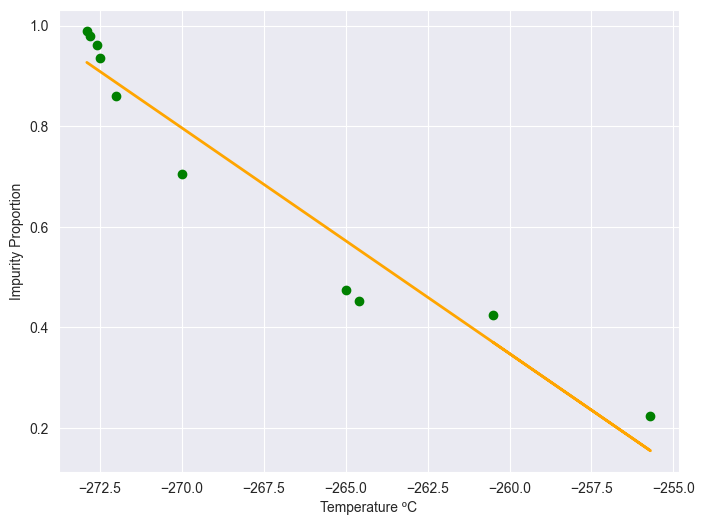

Regression function: y = -0.0449 * x + -11.3251
R2 = 0.9354924212184647


In [15]:
x = [[ -260.5, -255.7, -264.6, -265.0, -270.0, -272.0, -272.5, -272.6, -272.8, -272.9]]
y = [0.425, 0.224, 0.453, 0.475, 0.705, 0.860, 0.935, 0.961, 0.979, 0.990]

x = np.array(x).reshape(-1, 1)
y = np.array(y)

model_ex = LinearRegression()
model_ex.fit(x, y)

Y_pred = model_ex.predict(x)

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='green', label='Data Points')
plt.plot(x, Y_pred, color='orange', linewidth=2, label='Regression Line')
plt.xlabel('Temperature ºC')
plt.ylabel('Impurity Proportion')
plt.show()

print(f"Regression function: y = {model_ex.coef_[0]:.4f} * x + {model_ex.intercept_:.4f}")

print("R2 =", model_ex.score(x, y))

### Textbook 12.3 Multiple Linear Regression

In [12]:
y = [85, 74, 76, 90, 85, 87, 94, 98, 81, 91, 76, 74]
x1 = [65, 50, 55, 65, 55, 70, 65, 70, 55, 70, 50, 55]
x2 = [1, 7, 5, 2, 6, 3, 2, 5, 4, 3, 1, 4]

y = np.array(y)
X = np.array([x1, x2]).T

model = LinearRegression()
model.fit(X, y)

print(f"a) Multiple Linear Regression Model: y = {model.intercept_:.4f} + {model.coef_[0]:.4f} x1 + {model.coef_[1]:.4f} x2 ")

y_pred = model.predict([[60,4]])
print("b) Chemistry grade for a student who has an intelligence test score of 60 and missed 4 classes estimation: ", y_pred[0])

a) Multiple Linear Regression Model: y = 27.5467 + 0.9217 x1 + 0.2842 x2 
b) Chemistry grade for a student who has an intelligence test score of 60 and missed 4 classes estimation:  83.98440461830089


### Textbook 12.7 Quadratic Regression

           2
0.0003091 x - 0.2819 x + 141.6


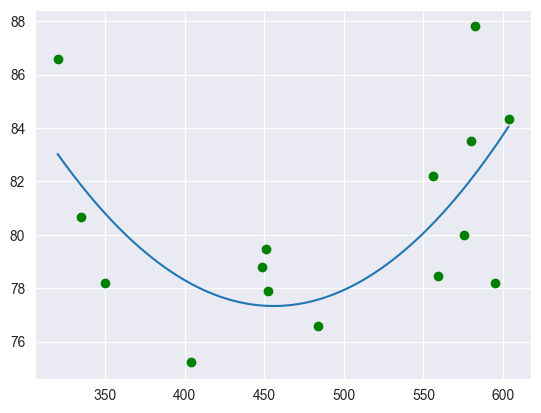

In [12]:
y = [84.33, 87.80, 82.20, 78.21, 78.44, 80.01, 83.53, 79.46, 75.22, 76.58, 77.90, 78.80, 80.67, 86.60, 78.20]
x = [603.40, 582.50, 556.20, 594.60, 558.90, 575.20, 580.10, 451.20, 404.00, 484.00, 452.40, 448.40, 334.80, 320.30, 350.30]

model = np.poly1d(np.polyfit(x, y, 2))
polyline = np.linspace(np.min(x),np.max(x), 100)
plt.scatter(x, y, color='green', label='Data Points')
plt.plot(polyline, model(polyline))

print(model)

### Textbook 12.15 Multiple Linear Regression

In [19]:
y = [11.2, 14.5, 17.2, 17.8, 19.3, 24.5, 21.2, 16.9, 14.8, 20.0, 13.2, 22.5]
x1 = [56.5, 59.5, 69.2, 74.5, 81.2, 88.0, 78.2, 69.0, 58.1, 80.5, 58.3, 84.0]
x2 = [71.0, 72.5, 76.0, 79.5, 84.0, 86.2, 80.5, 72.0, 68.0, 85.0, 71.0, 87.2]
x3 = [38.5, 38.2, 42.5, 43.4, 47.5, 47.4, 44.5, 41.8, 42.1, 48.1, 37.5, 51.0]
x4 = [43.0, 44.8, 49.0, 56.3, 60.2, 62.0, 58.1, 48.1, 46.0, 60.3, 47.1, 65.2]

y = np.array(y)
X = np.array([x1,x2,x3,x4]).T

model = LinearRegression()
model.fit(X, y)
print(f"Multiple Linear Regression Function: {model.intercept_:.4f} + {model.coef_[0]:.4f} x1 + {model.coef_[1]:.4f} x2 + {model.coef_[2]:.4f} x3 + {model.coef_[3]:.4f} x4")
model.summary()

Multiple Linear Regression Function: 3.3205 + 0.4210 x1 + -0.2958 x2 + 0.0164 x3 + 0.1247 x4


AttributeError: 'LinearRegression' object has no attribute 'summary'

### Textbook 12.69 Multiple Linear Regression - Partial F-Tests on Subsets of Coefficients & Studentized Residuals

Multiple Linear Regression: y = -0.26891084717030755 + 0.07755295618962076 x1 + 0.025318606208370176 x2 + -0.0357523946527035 x3
a) f value 35.28104442874944

Studentized Residuals:
[-1.80235304e+00 -1.34368473e-03  4.61497426e-01 -3.26124065e-01
  3.85661881e-01  2.44034149e+00 -4.43650301e-01  1.02645803e+00
 -3.55050670e-02  2.59763866e+00 -3.55156602e-01 -5.87610712e-01
 -2.04570318e+00 -2.92360375e-01  4.74822900e-01 -8.38252827e-01
 -8.46019726e-02 -2.76571131e-01 -7.60267953e-01  3.17322735e-01]


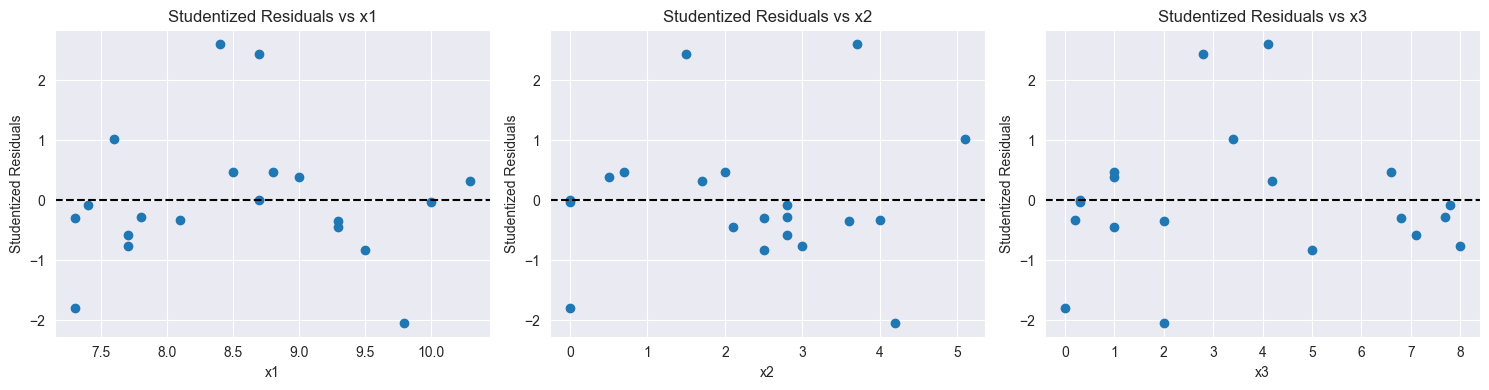

In [38]:
y = [0.2220,0.3950,0.4220,0.4370,0.4280,0.4670,0.4440,0.3780,0.4940,0.4560,0.4520,0.1120,0.4320,0.1010,0.2320,0.3060,0.0923,0.1160,0.0764,.4390]
x1 = [7.3, 8.7, 8.8, 8.1, 9.0, 8.7, 9.3, 7.6, 10.0, 8.4, 9.3, 7.7, 9.8, 7.3, 8.5, 9.5, 7.4, 7.8, 7.7, 10.3]
x2 = [0.0, 0.0, 0.7, 4.0, 0.5, 1.5, 2.1, 5.1, 0.0, 3.7, 3.6, 2.8, 4.2, 2.5, 2.0, 2.5, 2.8, 2.8, 3.0, 1.7]
x3 = [0.0, 0.3, 1.0, 0.2, 1.0, 2.8, 1.0, 3.4, 0.3, 4.1, 2.0, 7.1, 2.0, 6.8, 6.6, 5.0, 7.8, 7.7, 8.0, 4.2]

y = np.array(y)
X = np.array([x1, x2, x3]).T

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(f"Multiple Linear Regression: y = {model.params[0]} + {model.params[1]} x1 + {model.params[2]} x2 + {model.params[3]} x3")

print("a) f value", model.fvalue)

# Producing studentized residual
#stud_res = model.outlier_test()
stud_resid = model.get_influence().resid_studentized_external

print("\nStudentized Residuals:")
print(stud_resid)
#print(model.outlier_test())

# Create subplots for all three predictors
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot vs x1
axes[0].scatter(x1, stud_resid)
axes[0].axhline(y=0, color='black', linestyle='--')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('Studentized Residuals')
axes[0].set_title('Studentized Residuals vs x1')

# Plot vs x2
axes[1].scatter(x2, stud_resid)
axes[1].axhline(y=0, color='black', linestyle='--')
axes[1].set_xlabel('x2')
axes[1].set_ylabel('Studentized Residuals')
axes[1].set_title('Studentized Residuals vs x2')

# Plot vs x3
axes[2].scatter(x3, stud_resid)
axes[2].axhline(y=0, color='black', linestyle='--')
axes[2].set_xlabel('x3')
axes[2].set_ylabel('Studentized Residuals')
axes[2].set_title('Studentized Residuals vs x3')

plt.tight_layout()
plt.show()

### Texbook - Analysis of variance (anova) and Boxplots

H0: The mean variance do not differ significantly - not rejected since p-value is:  0.9024205151050707


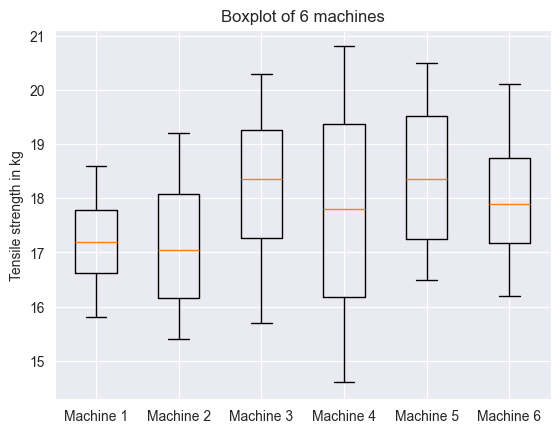

In [49]:
m1 = [17.5, 16.9, 15.8, 18.6]
m2 = [16.4, 19.2, 17.7, 15.4]
m3 = [20.3, 15.7, 17.8, 18.9]
m4 = [14.6, 16.7, 20.8, 18.9]
m5 = [17.5, 19.2, 16.5, 20.5]
m6 = [18.3, 16.2, 17.5, 20.1]

st, pval = stats.f_oneway(m1, m2, m3, m4, m5, m6)

if pval < 0.05:
    print("H0: The mean variance do not differ significantly - is rejected since p-value is: ", pval)
else:
    print("H0: The mean variance do not differ significantly - not rejected since p-value is: ", pval)

plt.boxplot([m1, m2, m3, m4, m5, m6], tick_labels=['Machine 1', 'Machine 2', 'Machine 3', 'Machine 4', 'Machine 5', 'Machine 6'])

# Adding a title and labels
plt.title('Boxplot of 6 machines')
plt.ylabel('Tensile strength in kg')

# Display the plot
plt.show()

### Textbook 13.5 - Analysis of mean variance

Reject H0: Mean variances don't differ significantly p-value:  0.0012239753560694332


{'whiskers': [<matplotlib.lines.Line2D at 0x18f99d725d0>,
 'caps': [<matplotlib.lines.Line2D at 0x18f99d72850>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f99d72490>,
 'medians': [<matplotlib.lines.Line2D at 0x18f99d72ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18f99d72c10>,
 'means': []}

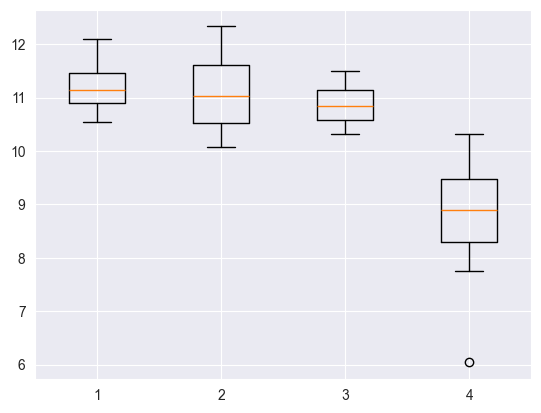

In [54]:
c0 = [11.01, 12.09, 10.55, 11.26]

c80 = [11.38, 10.67, 12.33, 10.08]

c160 = [11.02, 10.67, 11.50, 10.31]

c360 = [6.04, 10.31, 8.65, 8.30, 7.76, 9.48, 10.13, 8.89, 9.36]

st, pval = stats.f_oneway(c0, c80, c160, c360)

if pval < 0.01:
    print("Reject H0: Mean variances don't differ significantly p-value: ", pval)
else:
    print("Do not reject H0: Mean variances don't differ significantly, p-value: ", pval)

plt.boxplot([c0, c80, c160, c360])

### Textbook 16.21 - Kruskal Wallis test

In [55]:
A = [4.9, 6.1, 4.3, 4.6, 5.2]
B = [5.5, 5.4, 6.2, 5.8, 5.5, 5.2, 4.8]
C = [6.4, 6.8, 5.6, 6.5, 6.3, 6.6]

stat, pvalue = stats.kruskal(A, B, C)

if pval < 0.01:
    print("Reject H0, the operating times of the machines are not equal sice p-value: ", pval)
else:
    print("Do not reject H0, the operating times of the machines are possibly equal sice p-value: ", pval)

Reject H0, the operating times of the machines are not equal sice p-value:  0.0012239753560694332


### Exam

#### 8

In [69]:
x = [173, 163, 157, 165, 168, 171, 167, 158, 170, 168]
y = [58, 49, 49, 52, 57, 60, 55, 47, 57, 56]
Ex = np.mean(x)
Ey = np.mean(y)

Sxy = 0
Sxx = 0
Syy = 0

for i in range(0, len(y)):
    Sxx += (x[i] - Ex)**2
    Syy += (y[i] - Ey)**2
    Sxy += (x[i] - Ex)*(y[i] - Ey)

r = Sxy / np.sqrt(Sxx*Syy)
print(Sxx, Sxy, Syy, r)

254.0 199.0 178.0 0.9358930386969695


#### 10

In [92]:
B = ["88B", "80B", "79B", "68B", "97B", "69B"]
J =["87J", "99J", "78J", "82J", "85J", "99J", "85J", "94J", "81J"]
S = ["88S", "76S", "85S", "68S", "82S", "82S", "84S", "83S"]
W = ["80W", "85W", "56W", "71W", "89W"]

B.sort()
J.sort()
S.sort()
W.sort()

sorted = []
sorted.extend(B)
sorted.extend(J)
sorted.extend(S)
sorted.extend(W)
sorted.sort()

print(sorted)



['56W', '68B', '68S', '69B', '71W', '76S', '78J', '79B', '80B', '80W', '81J', '82J', '82S', '82S', '83S', '84S', '85J', '85J', '85S', '85W', '87J', '88B', '88S', '89W', '94J', '97B', '99J', '99J']


#### Ex 12.a) Solution

In [119]:
from scipy.stats import norm, binom
import numpy as np
import math

# Given values
p = 0.4
q = 0.6
k1 = 0.1
k2 = 0.9

# Function to check if condition holds
def check_condition(n):
    # Calculate z1 and z2
    z1 = (k1 - p) * n / np.sqrt(n * p * q)
    z2 = (k2 - p) * n / np.sqrt(n * p * q)

    # Calculate P(z1 ≤ Z ≤ z2)
    prob_Z = norm.cdf(z2) - norm.cdf(z1)

    # Calculate P(k1*n ≤ X ≤ k2*n) for binomial
    low_k = math.ceil(k1 * n)
    up_k = math.floor(k2 * n)
    prob_Bin = binom.cdf(up_k, n, p) - binom.cdf(low_k - 1, n, p)

    dif = abs(prob_Bin - prob_Z)
    return dif, prob_Bin, prob_Z


for n in range(1, 10000):
    dif, prob_Bin, prob_Z = check_condition(n)

    print(f"n = {n:4d}: P(Bin) = {prob_Bin:.6f}, P(Z) = {prob_Z:.6f}, Difference = {dif:.6f}")

    dif_next, _ ,_ = check_condition(n+1)

    #Check if both current n and next n suit the condition since we are looking for n ≥ n0
    if dif <= 0.001 and dif_next <= 0.001:
        break

print("The smallest integer n0 such that for all n ≥ n0 is:", n)

n =    1: P(Bin) = 0.000000, P(Z) = 0.576137, Difference = 0.576137
n =    2: P(Bin) = 0.480000, P(Z) = 0.732305, Difference = 0.252305
n =    3: P(Bin) = 0.720000, P(Z) = 0.817028, Difference = 0.097028
n =    4: P(Bin) = 0.844800, P(Z) = 0.869051, Difference = 0.024251
n =    5: P(Bin) = 0.912000, P(Z) = 0.903309, Difference = 0.008691
n =    6: P(Bin) = 0.949248, P(Z) = 0.926983, Difference = 0.022265
n =    7: P(Bin) = 0.970368, P(Z) = 0.943940, Difference = 0.026428
n =    8: P(Bin) = 0.982548, P(Z) = 0.956422, Difference = 0.026127
n =    9: P(Bin) = 0.989660, P(Z) = 0.965804, Difference = 0.023856
n =   10: P(Bin) = 0.993849, P(Z) = 0.972972, Difference = 0.020877
n =   11: P(Bin) = 0.969033, P(Z) = 0.978517, Difference = 0.009484
n =   12: P(Bin) = 0.980090, P(Z) = 0.982849, Difference = 0.002759
n =   13: P(Bin) = 0.987237, P(Z) = 0.986259, Difference = 0.000978
n =   14: P(Bin) = 0.991843, P(Z) = 0.988960, Difference = 0.002884
n =   15: P(Bin) = 0.994803, P(Z) = 0.991108, Di

#### Ex 12.b) Solution

n0:  31 for p: 0.01
n0:  191 for p: 0.05
n0:  7856 for p: 0.1
n0:  21 for p: 0.4
n0:  41 for p: 0.7
n0:  7856 for p: 0.9
n0:  31 for p: 0.99


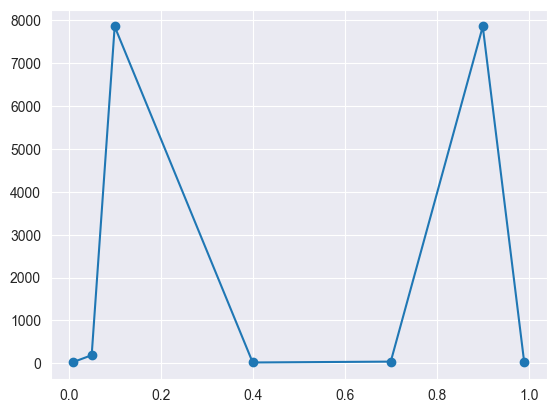

In [161]:
from scipy.stats import norm, binom
import numpy as np
import math
#Repeat the above simulation for several value of parameter p, then plot n0 against p.

# Given values
p = [0.01, 0.05, 0.10, 0.40, 0.70, 0.90, 0.99]
k1 = 0.1
k2 = 0.9

n0_values = list()

# Function to check if condition holds
def check_condition(n, p):
    q = 1 - p
    # Calculate z1 and z2
    z1 = (k1 - p) * n / np.sqrt(n * p * q)
    z2 = (k2 - p) * n / np.sqrt(n * p * q)

    # Calculate P(z1 ≤ Z ≤ z2)
    prob_Z = norm.cdf(z2) - norm.cdf(z1)

    # Calculate P(k1*n ≤ X ≤ k2*n) for binomial
    low_k = math.ceil(k1 * n)
    up_k = math.floor(k2 * n)
    prob_Bin = binom.cdf(up_k, n, p) - binom.cdf(low_k - 1, n, p)

    dif = abs(prob_Bin - prob_Z)
    return dif, prob_Bin, prob_Z

for val in p:
    for n in range(1, 10000):
        dif, prob_Bin, prob_Z = check_condition(n, val)
        dif_next, _ ,_ = check_condition(n+1, val)

        #Check if both current n and next 10 n suit the condition since we are looking for n ≥ n0
        if dif <= 0.001 and dif_next <= 0.001:
            n0_values.append(n)
            break

    print("n0: ", n, "for p:", val)

plt.plot(p, n0_values, marker='o')

#### Ex 12.b) AI solution

Finding n0 for p = 0.01...
  n0 = 500 for p = 0.01
Finding n0 for p = 0.05...
  n0 = 231 for p = 0.05
Finding n0 for p = 0.1...
Finding n0 for p = 0.4...
  n0 = 21 for p = 0.4
Finding n0 for p = 0.7...
  n0 = 47 for p = 0.7
Finding n0 for p = 0.9...
Finding n0 for p = 0.99...
  n0 = 500 for p = 0.99


C:\Users\User\AppData\Local\Temp\ipykernel_2368\3384714115.py:81: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()


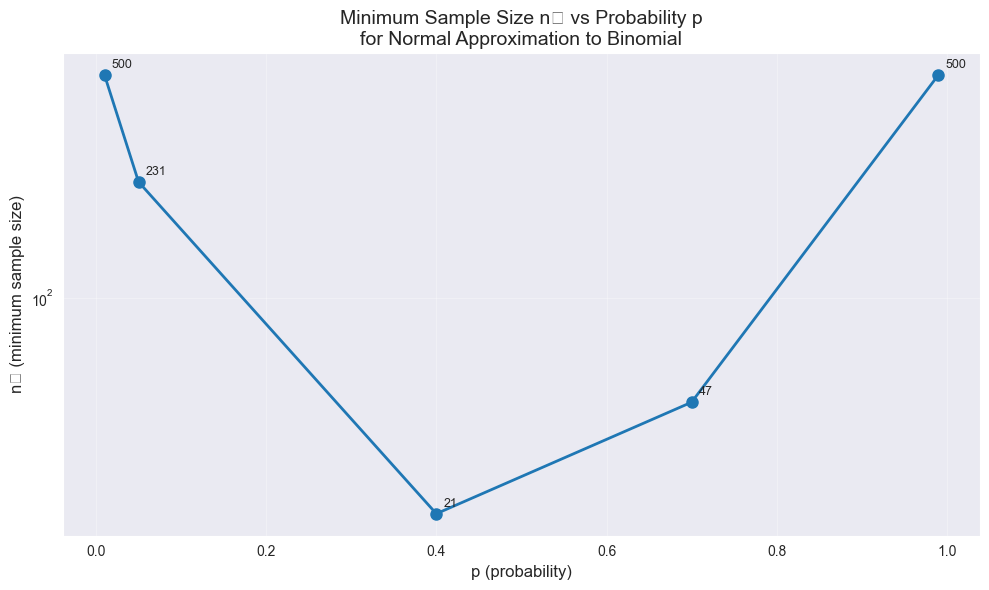


Summary:
p = 0.01  →  n₀ = 500
p = 0.05  →  n₀ = 231
p = 0.10  →  n₀ = NOT FOUND
p = 0.40  →  n₀ = 21
p = 0.70  →  n₀ = 47
p = 0.90  →  n₀ = NOT FOUND
p = 0.99  →  n₀ = 500


In [163]:
from scipy.stats import norm, binom
import numpy as np
import matplotlib.pyplot as plt

# Given values
p_values = [0.01, 0.05, 0.10, 0.40, 0.70, 0.90, 0.99]
k1 = 0.1
k2 = 0.9
tolerance = 0.001
consecutive_required = 10

n0_values = []

# Function to check if condition holds
def check_condition(n, p):
    q = 1 - p  # Calculate q based on p

    # Calculate z1 and z2
    sqrt_npq = np.sqrt(n * p * q)
    z1 = (k1 - p) * n / sqrt_npq
    z2 = (k2 - p) * n / sqrt_npq

    # Calculate P(z1 ≤ Z ≤ z2)
    prob_Z = norm.cdf(z2) - norm.cdf(z1)

    # Calculate P(k1*n ≤ X ≤ k2*n) for binomial
    low_k = int(np.ceil(k1 * n))
    up_k = int(np.floor(k2 * n))
    prob_Bin = binom.cdf(up_k, n, p) - binom.cdf(low_k - 1, n, p)

    error = abs(prob_Bin - prob_Z)
    return error

# Find n0 for each p value
for p in p_values:
    print(f"Finding n0 for p = {p}...")

    # Start from a reasonable minimum (rule of thumb: np >= 5 and nq >= 5)
    q = 1 - p
    n_start = max(10, int(np.ceil(5 / min(p, q))))

    found = False
    for n in range(n_start, 100000):
        error = check_condition(n, p)

        if error <= tolerance:
            # Check if the next consecutive_required values also satisfy
            all_satisfy = True
            for i in range(1, consecutive_required + 1):
                if check_condition(n + i, p) > tolerance:
                    all_satisfy = False
                    break

            if all_satisfy:
                n0_values.append(n)
                print(f"  n0 = {n} for p = {p}")
                found = True
                break

    if not found:
        print(f"  WARNING: No n0 found for p = {p} up to n = 10000")
        n0_values.append(None)

# Plot results
plt.figure(figsize=(10, 6))
valid_p = [p for p, n0 in zip(p_values, n0_values) if n0 is not None]
valid_n0 = [n0 for n0 in n0_values if n0 is not None]

plt.plot(valid_p, valid_n0, marker='o', linewidth=2, markersize=8)
plt.xlabel('p (probability)', fontsize=12)
plt.ylabel('n₀ (minimum sample size)', fontsize=12)
plt.title('Minimum Sample Size n₀ vs Probability p\nfor Normal Approximation to Binomial', fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale often makes this relationship clearer

# Add annotations
for p, n0 in zip(valid_p, valid_n0):
    plt.annotate(f'{n0}', xy=(p, n0), xytext=(5, 5),
                textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*50)
print("Summary:")
print("="*50)
for p, n0 in zip(p_values, n0_values):
    if n0 is not None:
        print(f"p = {p:4.2f}  →  n₀ = {n0}")
    else:
        print(f"p = {p:4.2f}  →  n₀ = NOT FOUND")

#### Ex 13.a) Solution

In [38]:
import numpy as np
from scipy import stats
# 1. Input of observation variable X (quantitative) and categorical variable K (qualitative)

X = list()
K = list()
while True:
    k = input("Insert the category name of the sample (categorical variable K): ")
    K.append(k)

    x = input(f"{k} - Insert corresponding observed values (quantitative variable X): ").split()
    x_float = [float(x) for x in x]
    X.append(x_float)

    exit = input("Would you like to continue (y/n)? ").lower()
    if exit[0] == "n":
     break

# 2. Find the number k of categories, thereafter extract group observation datasets X1, · · · ,Xk.

n_k = len(K)

for i in range(n_k):
    print("Category:", K[i], "\nValues:", X[i], "\n" )

#3. Compute the group means ¯x1. , · · · , ¯xk. and also total mean ¯x..
group_means = [np.mean(group) for group in X]
total_mean = np.mean([val for group in X for val in group])

print("Group means:", group_means)
print("Total mean:", total_mean)

# 4. Compute sum of squares: SST, SSA, SSE.
SST = 0
SSA = 0

for i in range(n_k):
    for j in range(len(X[i])):
        SST += (X[i][j] - total_mean)**2
    SSA += len(X[i])*(group_means[i] - total_mean)**2

SSE = SST - SSA

print("SST:", SST)
print("SSA:", SSA)
print("SSE:", SSE)

# 5. Compute treatment mean square s₁² , and the error mean square s² and thereafter test statistic f = s₁² / s²
n_i = [len(group) for group in X]
n = sum(n_i)

s1_squared = SSA / (n_k - 1)
s_squared = SSE / (n - n_k)

f_statistic = s1_squared / s_squared
print(f"\nF-statistic: f = s₁²/s² = {s1_squared:.4f} / {s_squared:.4f} = {f_statistic:.4f}")

# 6. Choose α the level of significance, and the degrees of freedom v1, v2 and also critical value fα.
alpha = input("Level of significance:")
alpha = float(alpha)

v1 = (n_k - 1)
v2 = (n - n_k)

critical_value = stats.f.ppf(1 - alpha, v1, v2)
print(f"\nCritical value (α = {alpha}): {critical_value:.4f}")

# 7. Decision: reject H0 or not.
if f_statistic < critical_value:
    print("Accept H₀ and all groups have same mean")

else:
    print("\nReject H₀: F-statistic is greater than critical value.")
# 9. If the result is rejection of H0, then check if there are at least two pairs of groups where the means are significant different. (In this case, it's obvious that the groups with the largest mean is significant different with the least mean group. So the next candidate pair of groups is either the largest mean and the second least mean or the second-largest mean and the least mean)
#9a. Check if the largest mean group and the second least mean group are significant different by using one-sided T-test. If the conclusion is yes, then go to step 10. Else, go to step 9b.
#9b. Check if the second largest mean group and the least mean group are significant different by using one-sided T-test.
    def one_sided_t_test(X, group_means, s_squared, n_i, i, j, alpha):
        """One-sided t-test: is mean_i > mean_j?"""
        n = sum(n_i)
        k = len(X)
        df = n - k
        mean_diff = group_means[i] - group_means[j]
        se = np.sqrt(s_squared * (1/n_i[i] + 1/n_i[j]))
        t_stat = mean_diff / se
        p_value = 1 - stats.t.cdf(t_stat, df)
        is_significant = p_value < alpha
        return is_significant, p_value, t_stat

    def group_tests(X, group_means, s_squared, n_i, alpha):
        n_k = len(X)
        sorted_idx = np.argsort(group_means)
        largest = sorted_idx[-1]
        smallest = sorted_idx[0]

        print("\n--- Step 9: Per group tests ---")
        print(f"Sorted groups by mean (lowest to highest): {[K[i] for i in sorted_idx]}")

        significant_pairs = []

        # Step 1: largest vs smallest
        sig_1, p1, t1 = one_sided_t_test(X, group_means, s_squared, n_i, largest, smallest, alpha)
        if sig_1:
            significant_pairs.append((largest, smallest))
        print(f"\n1. Largest ({K[largest]}) vs Smallest ({K[smallest]}): t = {t1:.4f}, p = {p1:.6f}, significant = {sig_1}")

        # If only two groups, stop here
        if n_k == 2:
            if sig_1:
                i, j = significant_pairs[0]
                print(f"\nReject H₀ and there are only two groups with significantly different means, "
                      f"i.e., group {K[i]} and group {K[j]}.")
            else:
                print("\nAccept H₀ and all groups have the same mean.")
            return

        # Step 9a: largest vs 2nd smallest
        second_smallest = sorted_idx[1]
        sig_2, p2, t2 = one_sided_t_test(X, group_means, s_squared, n_i, largest, second_smallest, alpha)
        if sig_2:
            significant_pairs.append((largest, second_smallest))
        print(f"\n2. Largest ({K[largest]}) vs 2nd Smallest ({K[second_smallest]}): "
              f"t = {t2:.4f}, p = {p2:.6f}, significant = {sig_2}")

        if sig_2:
            i1, j1 = significant_pairs[0]
            i2, j2 = significant_pairs[-1]
            print(f"\nReject H₀ and there are at least two pairs of groups with significantly different means, "
                  f"i.e., group {K[i1]} and group {K[j1]}; group {K[i2]} and group {K[j2]}.")
            return

        # Step 9b: 2nd largest vs smallest
        second_largest = sorted_idx[-2]
        sig_3, p3, t3 = one_sided_t_test(X, group_means, s_squared, n_i, second_largest, smallest, alpha)
        if sig_3:
            significant_pairs.append((second_largest, smallest))
        print(f"\n3. 2nd Largest ({K[second_largest]}) vs Smallest ({K[smallest]}): "
              f"t = {t3:.4f}, p = {p3:.6f}, significant = {sig_3}")

        total_sig = len(significant_pairs)
        if total_sig >= 2:
            formatted_pairs = "; ".join([f"group {K[i]} and group {K[j]}" for i, j in significant_pairs])
            print(f"\nReject H₀ and there are at least two pairs of groups with significantly different means, "
                  f"i.e., {formatted_pairs}.")
        elif total_sig == 1:
            i, j = significant_pairs[0]
            print(f"\nReject H₀ and there are only two groups with significantly different means, "
                  f"i.e., group {K[i]} and group {K[j]}.")
        else:
            print("\nAccept H₀ and all groups have the same mean.")

    # Run group comparisons
    group_tests(X, group_means, s_squared, n_i, alpha)

Category: G-1 
Values: [49.2, 44.54, 45.8, 95.84, 30.1, 36.5, 82.3, 87.85, 105.0, 95.22, 97.5, 105.0, 58.05, 86.6, 58.35, 72.8, 116.7, 45.15, 70.35, 77.4] 

Category: G-2 
Values: [97.07, 73.4, 68.5, 91.85, 106.6, 0.57, 0.79, 0.77, 0.81] 

Category: G-3 
Values: [62.1, 94.95, 142.5, 53.0, 175.0, 79.5, 29.5, 78.4, 127.5] 

Category: G-4 
Values: [110.6, 57.1, 117.6, 77.71, 150.0, 82.9, 111.5] 

Group means: [np.float64(73.0125), np.float64(48.928888888888885), np.float64(93.60555555555555), np.float64(101.05857142857143)]
Total mean: 76.67711111111112
SST: 67314.89852444445
SSA: 13938.601352619047
SSE: 53376.2971718254

F-statistic: f = s₁²/s² = 4646.2005 / 1301.8609 = 3.5689

Critical value (α = 0.05): 2.8327

Reject H₀: F-statistic is greater than critical value.

--- Step 9: Per group tests ---
Sorted groups by mean (lowest to highest): ['G-2', 'G-1', 'G-3', 'G-4']

1. Largest (G-4) vs Smallest (G-2): t = 2.8669, p = 0.003258, significant = True

2. Largest (G-4) vs 2nd Smallest (G-1

#### Ex 13.b) Solution

In [40]:
import numpy as np
from scipy import stats
import pandas as pd

# Load dataset
df = pd.read_excel('Data_source.xlsx')

# Define variables
K_labels = df['ethnicgp'].unique()             # all unique ethnic groups
X = [df[df['ethnicgp'] == k]['income'].dropna().tolist() for k in K_labels]
K = [str(k) for k in K_labels]                 # group labels as strings

print(f"\nLoaded dataset with {len(df)} rows and {len(K)} ethnic groups.")
for i in range(len(K)):
    print(f"Group {K[i]}: n = {len(X[i])}, mean income = {np.mean(X[i]):.2f}")

# 2. Find the number k of categories, thereafter extract group observation datasets X1, · · · ,Xk.

n_k = len(K)

for i in range(n_k):
    print("Category:", K[i], "\nValues:", X[i], "\n" )

#3. Compute the group means ¯x1. , · · · , ¯xk. and also total mean ¯x..
group_means = [np.mean(group) for group in X]
total_mean = np.mean([val for group in X for val in group])

print("Group means:", group_means)
print("Total mean:", total_mean)

# 4. Compute sum of squares: SST, SSA, SSE.
SST = 0
SSA = 0

for i in range(n_k):
    for j in range(len(X[i])):
        SST += (X[i][j] - total_mean)**2
    SSA += len(X[i])*(group_means[i] - total_mean)**2

SSE = SST - SSA

print("SST:", SST)
print("SSA:", SSA)
print("SSE:", SSE)

# 5. Compute treatment mean square s₁² , and the error mean square s² and thereafter test statistic f = s₁² / s²
n_i = [len(group) for group in X]
n = sum(n_i)

s1_squared = SSA / (n_k - 1)
s_squared = SSE / (n - n_k)

f_statistic = s1_squared / s_squared
print(f"\nF-statistic: f = s₁²/s² = {s1_squared:.4f} / {s_squared:.4f} = {f_statistic:.4f}")

# Compute using several levels of significance, for instance α = 0.10, 0.06, 0.02
significance = [0.10, 0.06, 0.02]
for alpha in significance:
    print(f"\nSignificance level: {alpha}")


    v1 = (n_k - 1)
    v2 = (n - n_k)

    critical_value = stats.f.ppf(1 - alpha, v1, v2)
    print(f"\nCritical value (α = {alpha}): {critical_value:.4f}")

    # 7. Decision: reject H0 or not.
    if f_statistic < critical_value:
        print("Accept H₀ and all groups have same mean")

    else:
        print("\nReject H₀: F-statistic is greater than critical value.")
    # 9. If the result is rejection of H0, then check if there are at least two pairs of groups where the means are significant different. (In this case, it's obvious that the groups with the largest mean is significant different with the least mean group. So the next candidate pair of groups is either the largest mean and the second least mean or the second-largest mean and the least mean)
    #9a. Check if the largest mean group and the second least mean group are significant different by using one-sided T-test. If the conclusion is yes, then go to step 10. Else, go to step 9b.
    #9b. Check if the second largest mean group and the least mean group are significant different by using one-sided T-test.
        def one_sided_t_test(X, group_means, s_squared, n_i, i, j, alpha):
            """One-sided t-test: is mean_i > mean_j?"""
            n = sum(n_i)
            k = len(X)
            df = n - k
            mean_diff = group_means[i] - group_means[j]
            se = np.sqrt(s_squared * (1/n_i[i] + 1/n_i[j]))
            t_stat = mean_diff / se
            p_value = 1 - stats.t.cdf(t_stat, df)
            is_significant = p_value < alpha
            return is_significant, p_value, t_stat

        def group_tests(X, group_means, s_squared, n_i, alpha):
            n_k = len(X)
            sorted_idx = np.argsort(group_means)
            largest = sorted_idx[-1]
            smallest = sorted_idx[0]

            print("\n--- Step 9: Per group tests ---")
            print(f"Sorted groups by mean (lowest to highest): {[K[i] for i in sorted_idx]}")

            significant_pairs = []

            # Step 1: largest vs smallest
            sig_1, p1, t1 = one_sided_t_test(X, group_means, s_squared, n_i, largest, smallest, alpha)
            if sig_1:
                significant_pairs.append((largest, smallest))
            print(f"\n1. Largest ({K[largest]}) vs Smallest ({K[smallest]}): t = {t1:.4f}, p = {p1:.6f}, significant = {sig_1}")

            # If only two groups, stop here
            if n_k == 2:
                if sig_1:
                    i, j = significant_pairs[0]
                    print(f"\nReject H₀ and there are only two groups with significantly different means, "
                          f"i.e., group {K[i]} and group {K[j]}.")
                else:
                    print("\nAccept H₀ and all groups have the same mean.")
                return

            # Step 9a: largest vs 2nd smallest
            second_smallest = sorted_idx[1]
            sig_2, p2, t2 = one_sided_t_test(X, group_means, s_squared, n_i, largest, second_smallest, alpha)
            if sig_2:
                significant_pairs.append((largest, second_smallest))
            print(f"\n2. Largest ({K[largest]}) vs 2nd Smallest ({K[second_smallest]}): "
                  f"t = {t2:.4f}, p = {p2:.6f}, significant = {sig_2}")

            if sig_2:
                i1, j1 = significant_pairs[0]
                i2, j2 = significant_pairs[-1]
                print(f"\nReject H₀ and there are at least two pairs of groups with significantly different means, "
                      f"i.e., group {K[i1]} and group {K[j1]}; group {K[i2]} and group {K[j2]}.")
                return

            # Step 9b: 2nd largest vs smallest
            second_largest = sorted_idx[-2]
            sig_3, p3, t3 = one_sided_t_test(X, group_means, s_squared, n_i, second_largest, smallest, alpha)
            if sig_3:
                significant_pairs.append((second_largest, smallest))
            print(f"\n3. 2nd Largest ({K[second_largest]}) vs Smallest ({K[smallest]}): "
                  f"t = {t3:.4f}, p = {p3:.6f}, significant = {sig_3}")

            total_sig = len(significant_pairs)
            if total_sig >= 2:
                formatted_pairs = "; ".join([f"group {K[i]} and group {K[j]}" for i, j in significant_pairs])
                print(f"\nReject H₀ and there are at least two pairs of groups with significantly different means, "
                      f"i.e., {formatted_pairs}.")
            elif total_sig == 1:
                i, j = significant_pairs[0]
                print(f"\nReject H₀ and there are only two groups with significantly different means, "
                      f"i.e., group {K[i]} and group {K[j]}.")
            else:
                print("\nAccept H₀ and all groups have the same mean.")

        # Run group comparisons
        group_tests(X, group_means, s_squared, n_i, alpha)


Loaded dataset with 70 rows and 4 ethnic groups.
Group 1: n = 35, mean income = 15.61
Group 2: n = 17, mean income = 15.79
Group 3: n = 14, mean income = 15.46
Group 4: n = 2, mean income = 16.10
Category: 1 
Values: [16.6, 16.0, 16.6, 14.2, 17.0, 16.6, 13.4, 17.4, 18.0, 14.0, 16.2, 12.4, 13.6, 14.4, 15.0, 15.6, 15.0, 13.2, 20.6, 13.6, 14.6, 18.2, 15.2, 13.0, 19.0, 17.2, 15.6, 15.4, 13.8, 17.8, 14.2, 13.6, 21.0, 14.6, 13.8] 

Category: 2 
Values: [14.6, 18.6, 17.6, 13.8, 15.8, 16.0, 16.4, 16.6, 16.0, 11.8, 17.6, 18.0, 13.4, 15.0, 14.0, 15.8, 17.4] 

Category: 3 
Values: [17.8, 16.4, 17.6, 18.2, 15.0, 17.6, 17.0, 12.4, 13.6, 13.4, 14.8, 12.8, 13.8, 16.0] 

Category: 4 
Values: [18.0, 14.2] 

Group means: [np.float64(15.61142857142857), np.float64(15.788235294117646), np.float64(15.457142857142859), np.float64(16.1)]
Total mean: 15.63823529411765
SST: 266.90058823529415
SSA: 1.2932268907562923
SSE: 265.6073613445379

F-statistic: f = s₁²/s² = 0.4311 / 4.1501 = 0.1039

Significance level